In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df

,From,To
0,Abduction,Bayesian Epistemology
1,Abduction,The Problem of Induction
2,Abduction,Charles Sanders Peirce
3,Abduction,Scientific Explanation
4,Abduction,Scientific Realism
...,...,...
17871,Zombies,Physicalism
17872,Zombies,Private Language
17873,Zombies,Qualia
17874,Zombies,Skepticism


In [4]:
G = nx.from_pandas_edgelist(df, 'From', 'To')

In [5]:
nx.is_connected(G)

True

In [6]:
type(G)

networkx.classes.graph.Graph

In [7]:
H = nx.from_pandas_edgelist(df, 'From', 'To', create_using=nx.DiGraph)

In [8]:
nx.is_weakly_connected(H)

True

In [9]:
nx.is_strongly_connected(H)

False

In [10]:
nx.edge_connectivity(G)

2

In [11]:
nx.minimum_edge_cut(G)

{('Boltzmann’s Work in Statistical Physics', 'The Ergodic Hierarchy'),
 ('Supervenience', 'The Ergodic Hierarchy')}

Tutaj przydałoby się pokazać ile wchodzi połączeń z wierzchołka "William Stanley Jevons", a ile wychodzi. Sprawdziłem samą encyklopedię bezpośrednio i wychodzi na to, że "Emily Jones" to jedyny artykuł, który linkuje do tego, a jedyny do którego linkuje on sam to "Boole". 

In [12]:
nx.degree(G, 'William Stanley Jevons')

2

In [13]:
H.in_degree('William Stanley Jevons')

1

In [14]:
H.in_edges('William Stanley Jevons')

InEdgeDataView([('Emily Elizabeth Constance Jones', 'William Stanley Jevons')])

In [15]:
H.out_degree('William Stanley Jevons')

1

In [16]:
H.out_edges('William Stanley Jevons')

OutEdgeDataView([('William Stanley Jevons', 'George Boole')])

Minimal edge cut for this graph is for two edges leading in and out of node 'William Stanley Jevons', because corresponding article is linked only in 'Emily Elizabeth Constance Jones' and is linking only to article 'George Bool'.

In [17]:
nx.node_connectivity(G)

2

In [18]:
nx.minimum_node_cut(G)

{'Maimonides', 'Marsilio Ficino'}

Output of function above shows that if we delete two articles, 'Maimonides' and 'Marsilio Ficino', body of work of philosophy, as represented by Stanford Encyclopedia of Philosophy, becomes disconnected. Further exploration could reveal why that is the case.

In [19]:
nx.average_shortest_path_length(G)

3.172460007790476

In [20]:
nx.radius(G)

4

In [21]:
nx.diameter(G)

6

In [22]:
nx.center(G)

['The Problem of Induction',
 'Charles Sanders Peirce',
 'Scientific Explanation',
 'Simplicity',
 'Skepticism',
 'Medieval Mereology',
 'The Medieval Problem of Universals',
 'Atomism from the 17th to the 20th Century',
 'Epistemology',
 'Action',
 'Compatibilism',
 'Dispositions',
 'Arguments for Incompatibilism',
 'Modal Logic',
 'Causal Determinism',
 'Foreknowledge and Free Will',
 'God and Other Ultimates',
 'Trinity',
 'Abstract Objects',
 'The Analytic/Synthetic Distinction',
 'Object',
 'Physicalism',
 'Donald Davidson',
 'Intention',
 'Reasons for Action: Justification, Motivation, Explanation',
 'Phenomenology',
 'Possible Objects',
 'Consequentialism',
 'Darwinism',
 'John Dewey',
 'William James',
 'George Herbert Mead',
 'Josiah Royce',
 'Walter Benjamin',
 'Georg Wilhelm Friedrich Hegel',
 'Martin Heidegger',
 'Edmund Husserl',
 'Identity',
 'Immanuel Kant',
 'Karl Popper',
 'Truth',
 'Personal Autonomy',
 'Personal Identity',
 'Personal Identity and Ethics',
 'Well-Bein

In [23]:
nx.periphery(G)

['Judah Abrabanel',
 'Affirmative Action',
 'Equality of Educational Opportunity',
 'Equality of Opportunity',
 'Black Reparations',
 'African Sage Philosophy',
 'Contemporary Africana Philosophy',
 'Giovanni Pico della Mirandola',
 'Elijah Delmedigo',
 'William Heytesbury',
 'Algebra',
 'The Algebra of Logic Tradition',
 'George Boole',
 'Robert Alyngton',
 'Olympiodorus',
 'Ikhwân al-Safâ’',
 'Shem Tov Ibn Falaquera',
 'Henry of Ghent',
 'Pietro Pomponazzi',
 'Ibn ‘Arabî',
 'Pyrrho',
 'Marsilius of Inghen',
 'Francesco Patrizi',
 'Voting Methods',
 'The Modern History of Computing',
 'Ethics of Artificial Intelligence and Robotics',
 'Computing and Moral Responsibility',
 'Internet Research Ethics',
 'Search Engines and Ethics',
 'Peter Auriol',
 'Gregory of Rimini',
 'John Austin',
 'Citizenship',
 'Richard the Sophister',
 'The Kochen-Specker Theorem',
 'Public Health Ethics',
 'Bohr’s Correspondence Principle',
 'Copenhagen Interpretation of Quantum Mechanics',
 'The Uncertainty P

In [24]:
degree = dict(nx.degree(G))

In [81]:
G.degree['Zombies']

22

In [82]:
degree['Zombies']

22

In [78]:
degree.keys()

dict_keys(['Abduction', 'Bayesian Epistemology', 'The Problem of Induction', 'Charles Sanders Peirce', 'Scientific Explanation', 'Scientific Realism', 'Simplicity', 'Skepticism', 'Underdetermination of Scientific Theory', 'Peter Abelard', 'Aristotle’s Logic', 'Medieval Mereology', 'Medieval Theories of Relations', 'Medieval Theories of the Syllogism', 'The Medieval Problem of Universals', 'William of Champeaux', 'Abhidharma', 'Atomism from the 17th to the 20th Century', 'Ancient Atomism', 'Consciousness and Intentionality', 'Contradiction', 'Dharmakīrti', 'Epistemology', 'The Kyoto School', 'Madhyamaka', 'Mind in Indian Buddhist Philosophy', 'Nāgārjuna', 'Śāntarakṣita', 'Vasubandhu', 'Abilities', 'Action', 'Compatibilism', 'Indicative Conditionals', 'Dispositions', 'Arguments for Incompatibilism', 'Knowledge How', 'Modal Logic', 'Abner of Burgos', 'Aristotle’s Natural Philosophy', 'Hasdai Crescas', 'Causal Determinism', 'Foreknowledge and Free Will', 'God and Other Ultimates', 'Maimoni

In [25]:
max(degree, key=degree.get)

'Immanuel Kant'

In [26]:
degree['Immanuel Kant']

121

In [27]:
in_degree = {node: H.in_degree(node) for node in H.nodes}

In [28]:
max(in_degree, key=in_degree.get)

'Immanuel Kant'

In [29]:
in_degree['Immanuel Kant']

111

In [30]:
out_degree = {node: H.out_degree(node) for node in H.nodes}

In [31]:
max(out_degree, key=out_degree.get)

'Medieval Philosophy'

In [32]:
out_degree['Medieval Philosophy']

67

In [33]:
min(in_degree, key=in_degree.get)

'Judah Abrabanel'

In [34]:
in_degree['Judah Abrabanel']

0

In [35]:
min(out_degree, key=out_degree.get)

'African Sage Philosophy'

In [36]:
out_degree['African Sage Philosophy']

0

In [37]:
closeness = nx.closeness_centrality(G)

In [38]:
max(closeness, key=closeness.get)

'Immanuel Kant'

In [39]:
closeness['Immanuel Kant']

0.4173662748860638

In [40]:
min(closeness, key=closeness.get)

'African Sage Philosophy'

In [41]:
closeness['African Sage Philosophy']

0.22673964034401878

In [42]:
betweenness = nx.betweenness_centrality(G)

In [43]:
max(betweenness, key=betweenness.get)

'Aristotle'

In [44]:
betweenness['Aristotle']

0.041728738614636884

In [45]:
min(betweenness, key=betweenness.get)

'African Sage Philosophy'

In [46]:
betweenness['African Sage Philosophy']

0.0

In [47]:
eigenvector = nx.eigenvector_centrality(G)

In [48]:
max(eigenvector, key=eigenvector.get)

'Immanuel Kant'

In [49]:
eigenvector['Immanuel Kant']

0.13882510087228161

In [50]:
min(eigenvector, key=eigenvector.get)

'African Sage Philosophy'

In [51]:
pagerank = nx.pagerank(G)

In [52]:
max(pagerank, key=pagerank.get)

'Aristotle'

In [53]:
pagerank['Aristotle']

0.0035301272634158803

In [54]:
min(pagerank, key=pagerank.get)

'Justus Lipsius'

In [55]:
pagerank['Justus Lipsius']

0.00014406103276213563

In [56]:
load = nx.load_centrality(G)

In [57]:
max(load, key=load.get)

'Aristotle'

In [58]:
load['Aristotle']

0.03878943840523853

In [59]:
min(load, key=load.get)

'African Sage Philosophy'

In [60]:
load['African Sage Philosophy']

0.0

In [70]:
df_degree = pd.DataFrame(list(degree.items()), columns=['topic', 'value'])

In [71]:
df_degree

,topic,value
0,Abduction,22
1,Bayesian Epistemology,32
2,The Problem of Induction,34
3,Charles Sanders Peirce,40
4,Scientific Explanation,37
...,...,...
1736,Hans Vaihinger,9
1737,Moral Vegetarianism,7
1738,James Ward,7
1739,Simone Weil,9


In [83]:
df_degree[df_degree['topic'] == 'Zombies']

,topic,value
1056,Zombies,22


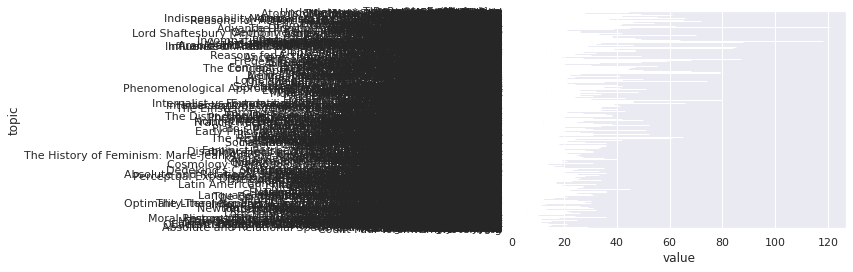

In [72]:
sns.set()

sns.barplot(data=df_degree, x='value', y='topic')

plt.show()